In [57]:
import pandas as pd

path = "../intermediate/schedules_cleaned.csv"

df = pd.read_csv(path)
df.head()

,game_id,season,week,date,team,opponent,is_home,team_score,opp_score,team_win,...,opp_penalties_prior1,opp_penalties_yds_prior1,opp_fga_prior1,opp_fgm_prior1,opp_xpa_prior1,opp_xpm_prior1,opp_plays_offense_prior1,opp_score_prior1,team_prob_novig,opp_prob_novig
0,2014_01_SD_ARI,2014,1,9/8/2014,ARI,SD,1,18,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591679,0.408321
1,2014_01_NO_ATL,2014,1,9/7/2014,ATL,NO,1,37,34,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399754,0.600246
2,2014_01_CIN_BAL,2014,1,9/7/2014,BAL,CIN,1,16,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517291,0.482709
3,2014_01_BUF_CHI,2014,1,9/7/2014,BUF,CHI,0,23,20,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287871,0.712129
4,2014_01_CAR_TB,2014,1,9/7/2014,CAR,TB,0,20,14,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324270,0.675730


In [58]:
leakage_cols = [
    # direct outcomes
    "home_score", "away_score", "team_score", "opp_score", 
    "point_diff", "Winner",

    # current team stats (not prior)
    "team_fga", "team_fgm", "team_first_down", "team_fumbles_lost",
    "team_pass_att", "team_pass_cmp", "team_pass_int",
    "team_pass_sacked", "team_pass_td", "team_pass_yds",
    "team_penalties", "team_penalties_yds",
    "team_plays_offense",
    "team_rush_att", "team_rush_td", "team_rush_yds",
    "team_turnovers",
    "team_xpa", "team_xpm",
    "team_punt", "team_punt_yds",
    "team_pass_sacked_yds",

    # current opponent stats (not prior)
    "opp_fga", "opp_fgm", "opp_first_down", "opp_fumbles_lost",
    "opp_pass_att", "opp_pass_cmp", "opp_pass_int",
    "opp_pass_sacked", "opp_pass_td", "opp_pass_yds",
    "opp_penalties", "opp_penalties_yds",
    "opp_plays_offense",
    "opp_rush_att", "opp_rush_td", "opp_rush_yds",
    "opp_turnovers",
    "opp_xpa", "opp_xpm",
    "opp_punt", "opp_punt_yds",
    "opp_pass_sacked_yds"
]

# drop leakage
df = df.drop(columns=leakage_cols, errors="ignore")

# list remaining columns
print("Remaining features:", df.columns.tolist())

print("Missing team_moneyline:", df["team_moneyline"].isna().sum())
df = df.dropna(subset=["team_moneyline"]) # drop rows that are the y target value

Remaining features: ['game_id', 'season', 'week', 'date', 'team', 'opponent', 'is_home', 'team_win', 'home_team', 'away_team', 'spread_line', 'total_line', 'stadium', 'roof', 'surface', 'temp', 'wind', 'game_type', 'weekday', 'gametime', 'location', 'referee', 'team_coach', 'team_moneyline', 'opp_coach', 'opp_moneyline', 'team_pass_att_prior1', 'team_pass_cmp_prior1', 'team_pass_yds_prior1', 'team_pass_td_prior1', 'team_pass_int_prior1', 'team_pass_sacked_prior1', 'team_rush_att_prior1', 'team_rush_yds_prior1', 'team_rush_td_prior1', 'team_first_down_prior1', 'team_turnovers_prior1', 'team_penalties_prior1', 'team_penalties_yds_prior1', 'team_fga_prior1', 'team_fgm_prior1', 'team_xpa_prior1', 'team_xpm_prior1', 'team_plays_offense_prior1', 'team_score_prior1', 'opp_pass_att_prior1', 'opp_pass_cmp_prior1', 'opp_pass_yds_prior1', 'opp_pass_td_prior1', 'opp_pass_int_prior1', 'opp_pass_sacked_prior1', 'opp_rush_att_prior1', 'opp_rush_yds_prior1', 'opp_rush_td_prior1', 'opp_first_down_prior

In [59]:
#print to gold ml ready csv
df.to_csv("../gold/schedules_gold.csv", index=False)
print(df.head())

           game_id  season  week      date team opponent  is_home  team_win  \
0   2014_01_SD_ARI    2014     1  9/8/2014  ARI       SD        1         1   
1   2014_01_NO_ATL    2014     1  9/7/2014  ATL       NO        1         1   
2  2014_01_CIN_BAL    2014     1  9/7/2014  BAL      CIN        1         0   
3  2014_01_BUF_CHI    2014     1  9/7/2014  BUF      CHI        0         1   
4   2014_01_CAR_TB    2014     1  9/7/2014  CAR       TB        0         1   

  home_team away_team  ...  opp_penalties_prior1  opp_penalties_yds_prior1  \
0       ARI        SD  ...                   NaN                       NaN   
1       ATL        NO  ...                   NaN                       NaN   
2       BAL       CIN  ...                   NaN                       NaN   
3       CHI       BUF  ...                   NaN                       NaN   
4        TB       CAR  ...                   NaN                       NaN   

  opp_fga_prior1 opp_fgm_prior1 opp_xpa_prior1  opp_xpm_

Train Models to Try and Predict Team win probability, if there is a discreptency between predicted probablity and markett implied porobablitliilyt based on betting lines, place a simulated bet, and see how accurate over the past 10 years it has been.

Train seasons: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Test season  : [2023]
Train/Test sizes: 4878/570
Using 46 numeric features.

[RandomForest]
LogLoss: 0.6533 | AUC: 0.6626 | Brier: 0.2306 | Accuracy: 0.6263 | F1: 0.6257

Top 15 features for RandomForest:
opp_prob_novig                 0.1409
spread_line                    0.0527
total_line                     0.0319
team_pass_yds_prior1           0.0301
opp_pass_yds_prior1            0.0294
opp_rush_yds_prior1            0.0292
team_rush_yds_prior1           0.0286
temp                           0.0281
team_penalties_yds_prior1      0.0277
opp_penalties_yds_prior1       0.0273
opp_score_prior1               0.0249
team_score_prior1              0.0248
team_plays_offense_prior1      0.0247
opp_plays_offense_prior1       0.0245
team_rush_att_prior1           0.0236


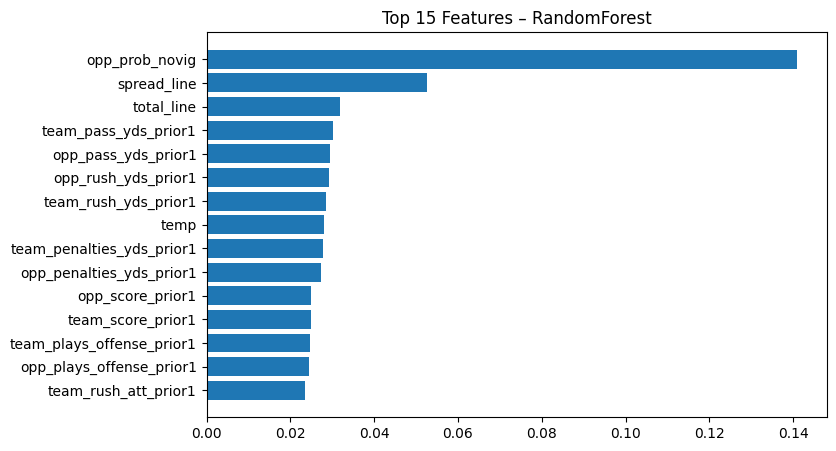


[XGBoost]
LogLoss: 0.7797 | AUC: 0.6201 | Brier: 0.2684 | Accuracy: 0.5982 | F1: 0.5903

Top 15 features for XGBoost:
opp_prob_novig                 0.0585
spread_line                    0.0277
opp_turnovers_prior1           0.0235
opp_xpa_prior1                 0.0235
team_pass_td_prior1            0.0224
opp_fgm_prior1                 0.0223
team_turnovers_prior1          0.0222
is_home                        0.0220
team_rush_td_prior1            0.0220
temp                           0.0218
team_xpm_prior1                0.0216
week                           0.0215
opp_penalties_yds_prior1       0.0214
team_pass_cmp_prior1           0.0212
team_xpa_prior1                0.0212


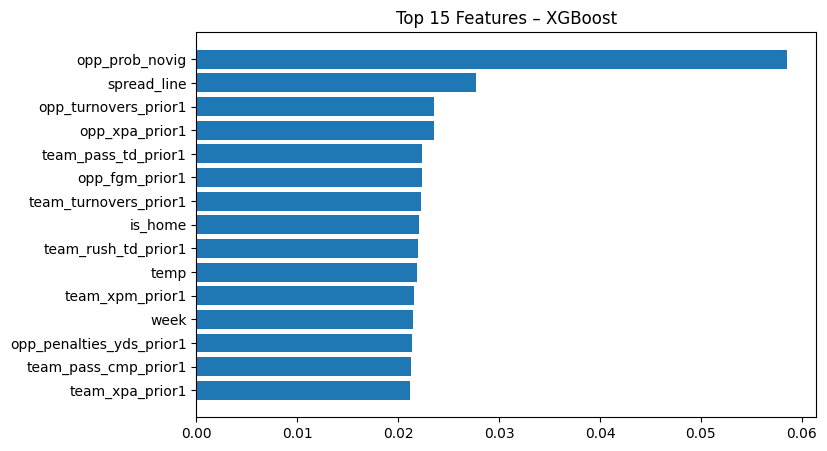


Bets placed: 101 | Total P&L: -23.51 | ROI/bet: -0.233 | Hit rate: 0.238 | Avg edge: 0.101

Bets placed: 212 | Total P&L: -33.21 | ROI/bet: -0.157 | Hit rate: 0.524 | Avg edge: 0.179

Top RF edges:
     season  week team opponent  team_moneyline  team_prob_novig   p_model  \
511    2023    17  WAS       SF           675.0         0.123822  0.407433   
292    2023    10  NYG      DAL          1100.0         0.080292  0.350095   
11     2023     1   GB      CHI          -102.0         0.482636  0.676570   
465    2023    16  LAC      BUF           550.0         0.147541  0.336050   
416    2023    15  ARI       SF           525.0         0.153499  0.332326   
543    2023    18  WAS      DAL           575.0         0.142056  0.316895   
479    2023    16  WAS      NYJ           140.0         0.400361  0.562132   
160    2023     6  CAR      MIA           700.0         0.120000  0.278576   
0      2023     1  ARI      WAS           270.0         0.259128  0.411905   
303    2023    11  CA

In [ ]:
# --- 0) Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

from sklearn.ensemble import RandomForestClassifier

# XGBoost (pip install xgboost if needed)
from xgboost import XGBClassifier

# --- 1) Basic hygiene: drop rows with missing target or market fields
need_cols = ["team_win", "team_moneyline", "team_prob_novig", "season"]
dfm = df.dropna(subset=need_cols).copy()

# Ensure binary target
dfm["team_win"] = dfm["team_win"].astype(int)

# --- 2) Time-based split: last season as test
last_season = dfm["season"].max()
train = dfm[dfm["season"] < last_season].copy()
test  = dfm[dfm["season"] == last_season].copy()

print(f"Train seasons: {sorted(train['season'].unique())}")
print(f"Test season  : {sorted(test['season'].unique())}")
print(f"Train/Test sizes: {len(train)}/{len(test)}")

# --- 3) Feature selection (numeric only; exclude IDs, text, market, and target)
drop_exact = {
    "team_win","team_prob_novig", "opp_prob_novig", "spread_line", "total_line", 
    "team_moneyline","opp_moneyline",  # target & market
    "game_id","team","opponent","home_team","away_team",
    "referee","team_coach","opp_coach","stadium","roof","surface","location",
    "weekday","gametime","game_type","date","Winner"  # textual/meta not for baseline
}
num_cols = [c for c in dfm.columns if c not in drop_exact and pd.api.types.is_numeric_dtype(dfm[c])]

X_train, y_train = train[num_cols], train["team_win"].values
X_test,  y_test  = test[num_cols],  test["team_win"].values

print(f"Using {len(num_cols)} numeric features.")

# --- 4) Pipelines
pre = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols)
], remainder="drop")

rf = Pipeline([
    ("pre", pre),
    ("rf", RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    ))
])

xgb = Pipeline([
    ("pre", pre),
    ("xgb", XGBClassifier(
        n_estimators=800, max_depth=6, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, n_jobs=-1, random_state=42, objective="binary:logistic", eval_metric="logloss"
    ))
])

# --- 5) Train and evaluate (probability metrics)
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def evaluate_model(pipe, name, show_features=True, top_n=15):
    # Fit
    pipe.fit(X_train, y_train)
    p_test = pipe.predict_proba(X_test)[:, 1]  # probability team wins
    y_pred = (p_test >= 0.5).astype(int)

    # Core metrics
    ll   = log_loss(y_test, p_test)
    auc  = roc_auc_score(y_test, p_test)
    bs   = brier_score_loss(y_test, p_test)
    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print(f"\n[{name}]")
    print(f"LogLoss: {ll:.4f} | AUC: {auc:.4f} | Brier: {bs:.4f} | "
          f"Accuracy: {acc:.4f} | F1: {f1:.4f}")

    # Feature importance (if model supports it)
    if show_features:
        try:
            # Get model inside pipeline
            model = pipe.named_steps.get("rf") or pipe.named_steps.get("xgb")
            importances = model.feature_importances_
            feats = pipe.named_steps["pre"].transformers_[0][2]  # num_cols list
            feat_imp = sorted(zip(feats, importances), key=lambda x: x[1], reverse=True)
            
            print(f"\nTop {top_n} features for {name}:")
            for f, val in feat_imp[:top_n]:
                print(f"{f:30s} {val:.4f}")
            
            # Optional: barplot
            plt.figure(figsize=(8,5))
            plt.barh([f for f, _ in feat_imp[:top_n]][::-1],
                     [v for _, v in feat_imp[:top_n]][::-1])
            plt.title(f"Top {top_n} Features – {name}")
            plt.show()
        except Exception as e:
            print(f"(No feature importance available: {e})")

    return p_test

p_rf  = evaluate_model(rf,  "RandomForest")
p_xgb = evaluate_model(xgb, "XGBoost")

# --- 6) Betting simulation on the test set
def american_to_decimal(ml):
    ml = float(ml)
    return 1 + (ml/100.0 if ml > 0 else 100.0/abs(ml))

def prob_to_amer(p):
    p = float(p)
    if p <= 0 or p >= 1:
        return np.nan
    mult = (1 - p) / p
    return int(round(100*mult)) if mult >= 1 else int(round(-100/mult))

def fair_decimal_from_prob(p):
    return 1.0 / max(p, 1e-12)

def ev_from_prob_amer(p_win, amer, stake=1.0):
    d = american_to_decimal(amer)
    return p_win*(stake*(d-1.0)) - (1-p_win)*stake  # units

def fmt_money(x): return f"${x:,.2f}"
def fmt_pct(x):   return f"{100*x:.1f}%"
def fmt_amer(a):  a = int(round(a)); return f"{'+' if a>0 else ''}{a}"

UNIT = 100.0  # $ per unit for display

def betting_line_equivalent_from_hit(hit):
    return fmt_amer(prob_to_amer(hit)) if pd.notna(hit) else "—"

def simulate_bets(test_df, p_model, edge_thresh=0.06, stake=1.0):
    """
    Flat-stake strategy:
    - Bet the team if model_p - market_p (novig) >= edge_thresh.
    - Payout uses that row's team_moneyline.
    """
    out = test_df.copy().reset_index(drop=True)
    out["p_model"] = p_model
    out["edge"] = out["p_model"] - out["team_prob_novig"]

    # Bet decision
    out["bet"] = (out["edge"] >= edge_thresh).astype(int)

    # Profit per bet
    def profit(row):
        if row["bet"] == 0: 
            return 0.0
        dec = american_to_decimal(row["team_moneyline"])
        return (stake * (dec - 1.0)) if row["team_win"] == 1 else (-stake)

    out["profit"] = out.apply(profit, axis=1)
    out["cum_profit"] = out["profit"].cumsum()

    # Summary
    n_bets = int(out["bet"].sum())
    pnl    = float(out["profit"].sum())
    roi    = pnl / (n_bets * stake) if n_bets > 0 else 0.0
    hit    = out.loc[out["bet"]==1, "team_win"].mean() if n_bets > 0 else np.nan
    avg_edge = out.loc[out["bet"]==1, "edge"].mean() if n_bets > 0 else np.nan

    print(f"\nBets placed: {n_bets} | Total P&L: {pnl:.2f} | ROI/bet: {roi:.3f} | Hit rate: {hit:.3f} | Avg edge: {avg_edge:.3f}")
    return out[["season","week","team","opponent","team_moneyline","team_prob_novig","p_model","edge","bet","team_win","profit","cum_profit"]]

# Run sims (you can tune edge_thresh)
sim_rf  = simulate_bets(test, p_rf,  edge_thresh=0.06, stake=1.0)
sim_xgb = simulate_bets(test, p_xgb, edge_thresh=0.06, stake=1.0)

# --- 7) (Optional) quick peek at best edges & bankroll tail
print("\nTop RF edges:")
print(sim_rf.sort_values("edge", ascending=False).head(10))

print("\nFinal bankroll (RF/XGB):", sim_rf["cum_profit"].iloc[-1], "/", sim_xgb["cum_profit"].iloc[-1])